# Tentativa 1
Render do problema do taxi

In [6]:
import gym
env = gym.make("Taxi-v3").env
env.render()


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



# Tentativa 2
Teste aplicando as funções predeterminadas da lib para rodar. rodando os valores dentro do notebook, no cria a janela com o modelo e não é possível acompanahar a animação

In [20]:
import gym
env = gym.make('Acrobot-v1')
env.reset()
for _ in range(500):
    env.render()
    env.step(env.action_space.sample())

In [14]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [37]:
from gym import envs
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs]
print(env_ids)

['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v0', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Reacher-v2', 'Pusher-v2', 'Thrower-v2', 'Striker-v2', 'InvertedPendulum-v2', 'InvertedDoublePendulum-v2', 'HalfCheetah-v2', 'HalfCheetah-v3', 'Hopper-v2', 'Hopper-v3', 'Swimmer-v2', 'Swimmer-v3', 'Walker2d-v2', 'Walker2d-v3', 'Ant-v2', 'Ant-v3', 'Humanoid-v2', 'Humanoid-v3', 'HumanoidStandup-v2', 'FetchSlide-v1', 'FetchPickAndPlace-v1', 'FetchReach-v1', 'FetchPush-v1', 'HandReach-v0', 'HandManipulateBlockRotateZ-v0', 'HandManipulateBlockRotateZTouchSensors-v0', 'HandManipulateBlockRotateZTouchSensors-v1', 'HandManipulateBlockRotateParallel-v0', 'HandManipulateBlockRotateParallelTouchSensors-v0', 'HandManipulateBlockRotateParallelTouchSensors-v1', 'HandManipulateBlockRotateXYZ-v0', 'HandManip

# Tentativa 3
Salvando como video e criando uma janela para rodar

In [44]:
!apt-get install ffmpeg
!pip install imageio-ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package ffmpeg
     |████████████████████████████████| 26.9 MB 12.3 MB/s eta 0:00:01


In [45]:
import gym
from gym import wrappers

env = gym.make('BipedalWalker-v3')
env = wrappers.Monitor(env, "./gym-results", force=True)
env.reset()
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done: break
env.close()

Exception ignored in: <function Monitor.__del__ at 0x7f42bec5b310>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitor.py", line 289, in __del__
    self.close()
  File "/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitor.py", line 184, in close
    self._close_video_recorder()
  File "/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitor.py", line 270, in _close_video_recorder
    self.video_recorder.close()
  File "/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py", line 164, in close
    os.remove(self.path)
FileNotFoundError: [Errno 2] No such file or directory: '/notebooks/gym-results/openaigym.video.2.243.video000000.mp4'
Exception ignored in: <function VideoRecorder.__del__ at 0x7f42bec54310>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py", line 197, in __del__
    self.close()
  File "/usr/local/lib/python3.

In [46]:
import io
import base64
from IPython.display import HTML

video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

# Tentativa 4

Aplicando visualização com o display do ipython. demora bastante em renderizar o resultado.

In [48]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay


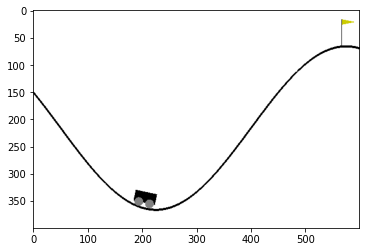

In [51]:
env = gym.make('MountainCar-v0')
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for _ in range(50):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    screen = env.render(mode='rgb_array')

    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    if done:
        break

ipythondisplay.clear_output(wait=True)
env.close()

# Tentativa 5
Método otimizado para rodar. Atualização da imagem.

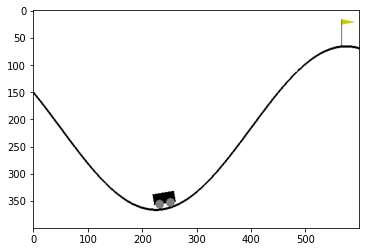

In [56]:


import gym
from IPython import display as ipythondisplay
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('MountainCar-v0')
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    ipythondisplay.display(plt.gcf())
    ipythondisplay.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

ipythondisplay.clear_output(wait=True)
env.close()

In [18]:
!apt-get install ffmpeg
!apt-get install libav-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package ffmpeg
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libav-tools


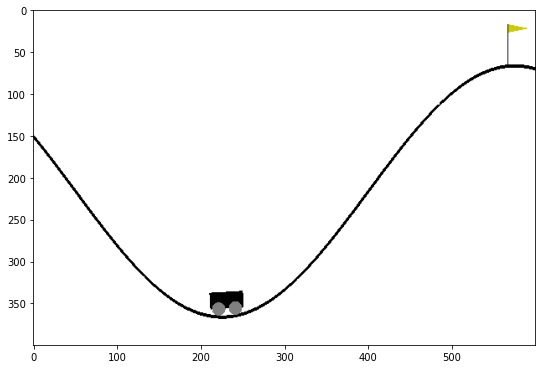

In [55]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('MountainCar-v0')
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(500):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()